In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
bus = pd.read_csv('./data/경기도_광주시_버스정류장_08_25_2021.csv', encoding='euc-kr', engine='python')
bus.shape

(998, 23)

In [3]:
bus.head()

,지형지물부호,관리번호,관리기관,행정구역,법정구역,법정동리,도로구간번호,공사번호,설치일자,정류장종류,...,취득구분,취득금액,관리부서,내용연수,쉘터설치유무,설치유무(BIT),온열의자설치유무,비고,경도,위도
0,정류장,92022037,광주시,경안동,역동,NaN,56,,2016-10-01,공용,...,매입,0.0,대중교통과,0.0,NaN,NaN,0.0,,127.253877,37.398346
1,정류장,92022036,광주시,경안동,역동,NaN,160431,,2016-10-01,공용,...,매입,0.0,대중교통과,0.0,NaN,NaN,NaN,,127.253232,37.397400
2,정류장,92022035,광주시,곤지암읍,곤지암읍,NaN,262355,,2016-01-01,공용,...,매입,0.0,대중교통과,0.0,NaN,NaN,NaN,,127.347931,37.349946
3,정류장,92022034,광주시,곤지암읍,곤지암읍,NaN,262355,,2016-01-01,공용,...,매입,0.0,대중교통과,0.0,NaN,NaN,NaN,,127.347834,37.350273
4,정류장,92022033,광주시,오포읍,오포읍,NaN,120993,,2010-01-01,공용,...,매입,0.0,대중교통과,0.0,NaN,NaN,NaN,,127.215960,37.359298


In [4]:
df_bus = bus[['도로구간번호', '법정구역', '정류장명', '정류장종류', '위도', '경도', '비고']]
df_bus

,도로구간번호,법정구역,정류장명,정류장종류,위도,경도,비고
0,56,역동,경기광주역,공용,37.398346,127.253877,
1,160431,역동,"경기광주역,경안천",공용,37.397400,127.253232,
2,262355,곤지암읍,곤지암역,공용,37.349946,127.347931,
3,262355,곤지암읍,곤지암역,공용,37.350273,127.347834,
4,120993,오포읍,오포초교 앞,공용,37.359298,127.215960,
...,...,...,...,...,...,...,...
993,160265,태전동,목림삼거리,일반버스,37.393171,127.223913,
994,396,역동,임시정류장,택시,37.406274,127.260016,
995,44,역동,구3번종점,공용,37.406047,127.259305,
996,481,역동,역동입구,공용,37.400048,127.254107,


In [5]:
df_bus.dtypes

도로구간번호      int64
법정구역       object
정류장명       object
정류장종류      object
위도        float64
경도        float64
비고         object
dtype: object

In [6]:
# 연산에 사용할 데이터가 아니기 때문에 object(문자열)형태로 변경한다.
df_bus['도로구간번호'] = df_bus['도로구간번호'].astype(str)

In [7]:
df_bus.dtypes

도로구간번호     object
법정구역       object
정류장명       object
정류장종류      object
위도        float64
경도        float64
비고         object
dtype: object

In [12]:
# folium을 이용한 지도 시각화
map_bus = folium.Map(location=[df_bus['위도'].mean(), df_bus['경도'].mean()], zoom_start=12)
for i in df_bus.index:
    # 택시 정류장인 경우 아이콘의 색상을 'red'로 한다.
    if df_bus['정류장명'][i] == 'TAXI정류장':
        bus_name = df_bus.loc[i, '정류장명']
        popup = folium.Popup(bus_name, max_width=200)
        folium.Marker(location=[df_bus.loc[i, '위도'], df_bus.loc[i, '경도']], popup=popup, icon=folium.Icon(color='red')).add_to(map_bus)
    # 현장에는 정류장이 없으나 BIS시스템 상에 존재하는 정류장은 아이콘의 색상을 'green'으로 한다.
    elif df_bus['비고'][i] == '현장에는 정류장이 없으나 BIS시스템 상에 존재하는 정류장':
        bus_name = df_bus.loc[i, '정류장명']
        popup = folium.Popup(bus_name, max_width=200)
        folium.Marker(location=[df_bus.loc[i, '위도'], df_bus.loc[i, '경도']], popup=popup, icon=folium.Icon(color='green')).add_to(map_bus)
    else:
        bus_name = df_bus.loc[i, '정류장명']
        popup = folium.Popup(bus_name, max_width=200)
        folium.Marker(location=[df_bus.loc[i, '위도'], df_bus.loc[i, '경도']], popup=popup).add_to(map_bus)

map_bus.save('./output/bus_map.html')
map_bus

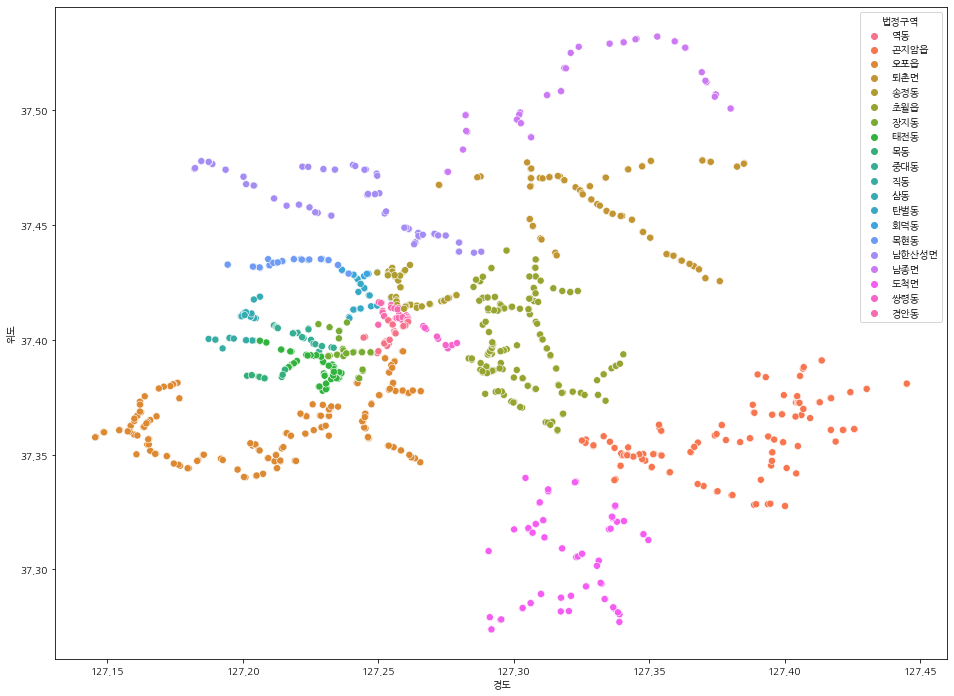

In [10]:
# seaborn을 이용한 시각화
# 법정구역별로 정류장색을 나눴다
plt.figure(figsize=[16, 12])
sns.scatterplot(data=df_bus, x='경도', y='위도', hue='법정구역', s=50)
plt.savefig('./output/project.png')